In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [6]:
train = pd.read_csv('train.csv')
train.head()

,image_names,class_type,xmin,xmax,ymin,ymax,Fname
0,C:\Users\Osama\Desktop\Final Year Project\kera...,0,81,116,33,65,2
1,C:\Users\Osama\Desktop\Final Year Project\kera...,1,70,105,231,263,2
2,C:\Users\Osama\Desktop\Final Year Project\kera...,0,120,155,39,71,3
3,C:\Users\Osama\Desktop\Final Year Project\kera...,1,103,138,225,257,3
4,C:\Users\Osama\Desktop\Final Year Project\kera...,1,109,144,215,247,4


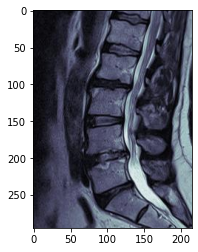

In [7]:
image = plt.imread('train_images/5.jpg')
plt.imshow(image)

In [8]:
train['image_names'].nunique()

100

In [9]:
train['class_type'].value_counts()

1    143
0    122
Name: class_type, dtype: int64

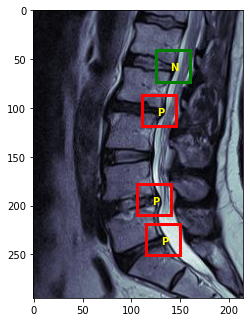

In [10]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('train_images/5.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == r"C:\Users\Osama\Desktop\Final Year Project\keras-frcnn\train_images\5.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.class_type == 1:
        edgecolor = 'r'
        ax.annotate('P', xy=(xmax-20,ymin+20),color = 'yellow', weight = 'bold')
    elif row.class_type == 0:
        edgecolor = 'g'
        ax.annotate('N', xy=(xmax-20,ymin+20), color = 'yellow', weight = 'bold')
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none', lw=3)
    
    ax.add_patch(rect)

In [11]:
data = pd.DataFrame()
data['format'] = train['image_names']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + str(train['class_type'][i])

data.to_csv('annotate.txt', header=None, index=None, sep=' ')